In [10]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns




In [2]:
df=pd.read_csv('/content/exams.csv')

df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.396000      69.002000      67.738000
std      15.402871      14.737272      15.600985
min      13.000000      27.000000      23.000000
25%      56.000000      60.000000      58.000000
50%      66.500000      70.000000      68.000000
75%      77.000000      79.000000      79.000000
max     100.000000     100.000000     100.000000

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0    male        group A                 high school      standard   
1  female        group D            some high school  free/reduced   
2    male        group E                some college  free/reduced   
3    male        group B                 high school      standard   
4    male        group E          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          67             67             63  
1                    none          40             59             55  
2                    none          59             60             50  
3                    none          77             78             68  
4               completed          78             73             68

In [4]:
average_scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean().reset_index()
print(average_scores_by_gender)


   gender  math score  reading score  writing score
0  female   63.196687      71.888199      71.708075
1    male   69.384913      66.305609      64.029014


In [5]:
parental_education_counts = df['parental level of education'].value_counts().reset_index()
parental_education_counts.columns = ['parental level of education', 'count']
print(parental_education_counts)


  parental level of education  count
0                some college    222
1          associate's degree    203
2                 high school    202
3            some high school    191
4           bachelor's degree    112
5             master's degree     70


In [6]:
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
print(correlation_matrix)


               math score  reading score  writing score
math score       1.000000       0.819398       0.805944
reading score    0.819398       1.000000       0.954274
writing score    0.805944       0.954274       1.000000


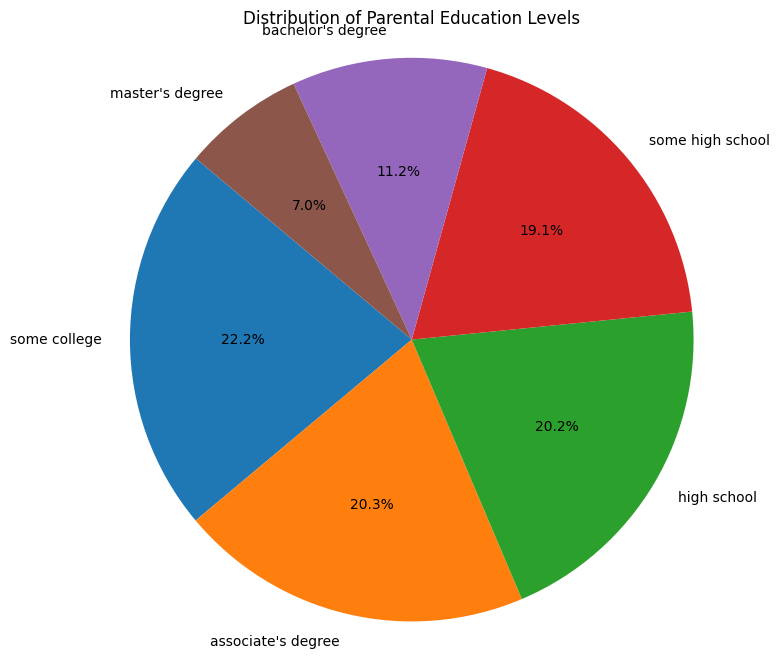

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(parental_education_counts['count'], labels=parental_education_counts['parental level of education'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Parental Education Levels')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


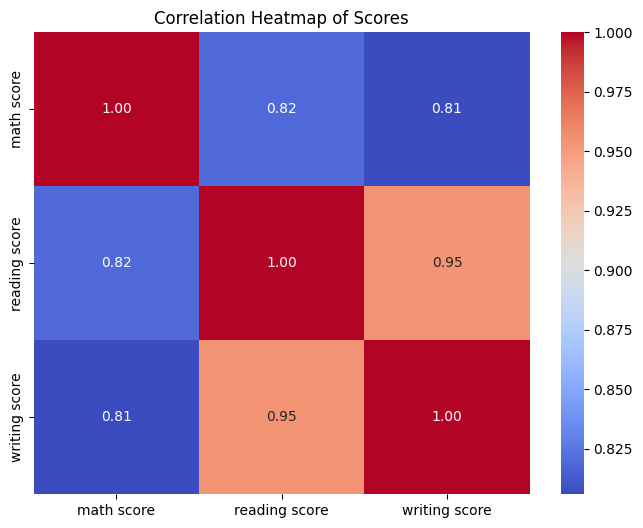

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Scores')
plt.show()


<ipython-input-12-bb01ffcb0f52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='math score', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a

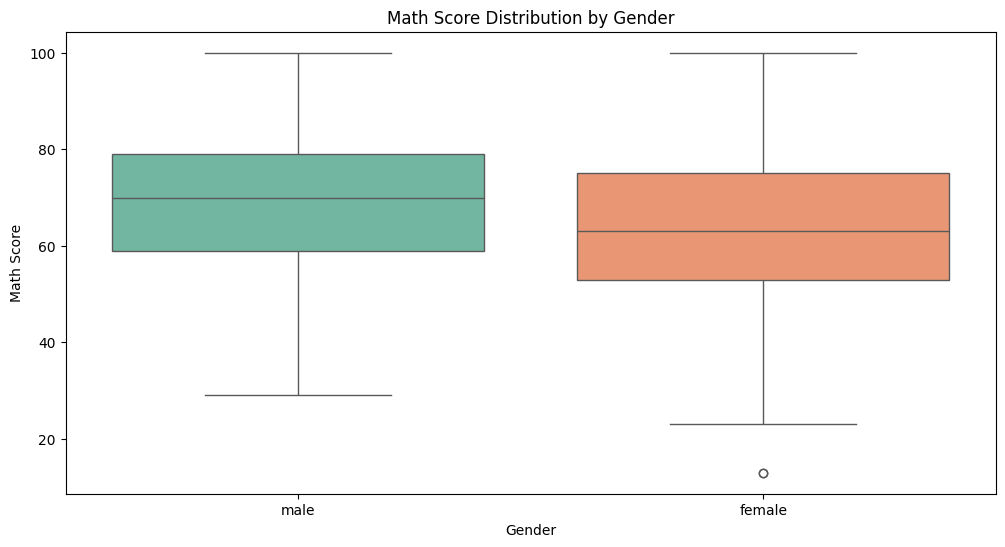

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='gender', y='math score', palette='Set2')
plt.title('Math Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()


<ipython-input-13-2716680c1d14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='parental level of education', palette='muted', order=df['parental level of education'].value_counts().index)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-pa

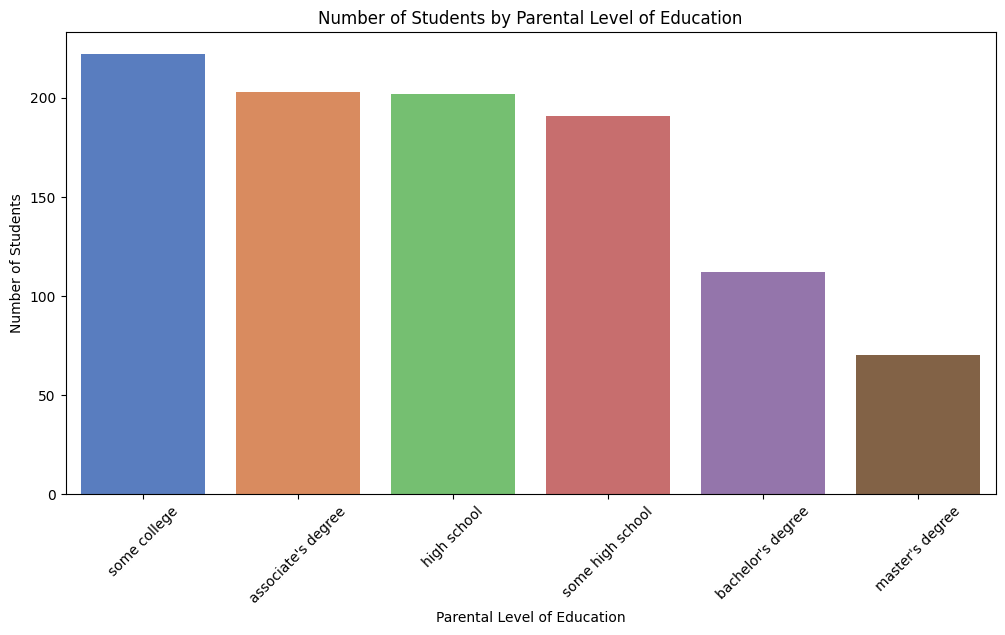

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', palette='muted', order=df['parental level of education'].value_counts().index)
plt.title('Number of Students by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()
